In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
data = pd.read_csv('day.csv')

# Display the first few rows of the dataframe
print(data.head())
# Check the descriptive information
print(data.info())

# Check the shape of df

print(data.shape)

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

In [100]:
#Removing redundant cloumns and duplicate records
data=data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
data.drop_duplicates(subset=None, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [101]:
# Convert to 'category' data type

data['season']=data['season'].astype('category')
data['weathersit']=data['weathersit'].astype('category')
data['mnth']=data['mnth'].astype('category')
data['weekday']=data['weekday'].astype('category')

In [102]:
import calendar
data['mnth'] = data['mnth'].apply(lambda x: calendar.month_abbr[x])


In [103]:
# Maping seasons
data.season = data.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
# Mapping weathersit
data.weathersit = data.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [104]:
#Mapping Weekday
data.weekday = data.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [105]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [106]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

data_new = pd.get_dummies(data, drop_first=True)
data_new.info()
print(data_new.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            730 non-null    int64  
 1   holiday                       730 non-null    int64  
 2   workingday                    730 non-null    int64  
 3   temp                          730 non-null    float64
 4   atemp                         730 non-null    float64
 5   hum                           730 non-null    float64
 6   windspeed                     730 non-null    float64
 7   cnt                           730 non-null    int64  
 8   season_Summer                 730 non-null    bool   
 9   season_Fall                   730 non-null    bool   
 10  season_Winter                 730 non-null    bool   
 11  mnth_Feb                      730 non-null    bool   
 12  mnth_Mar                      730 non-null    bool   
 13  mnth_

In [107]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(data_new, train_size = 0.70, test_size = 0.30, random_state = 333)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


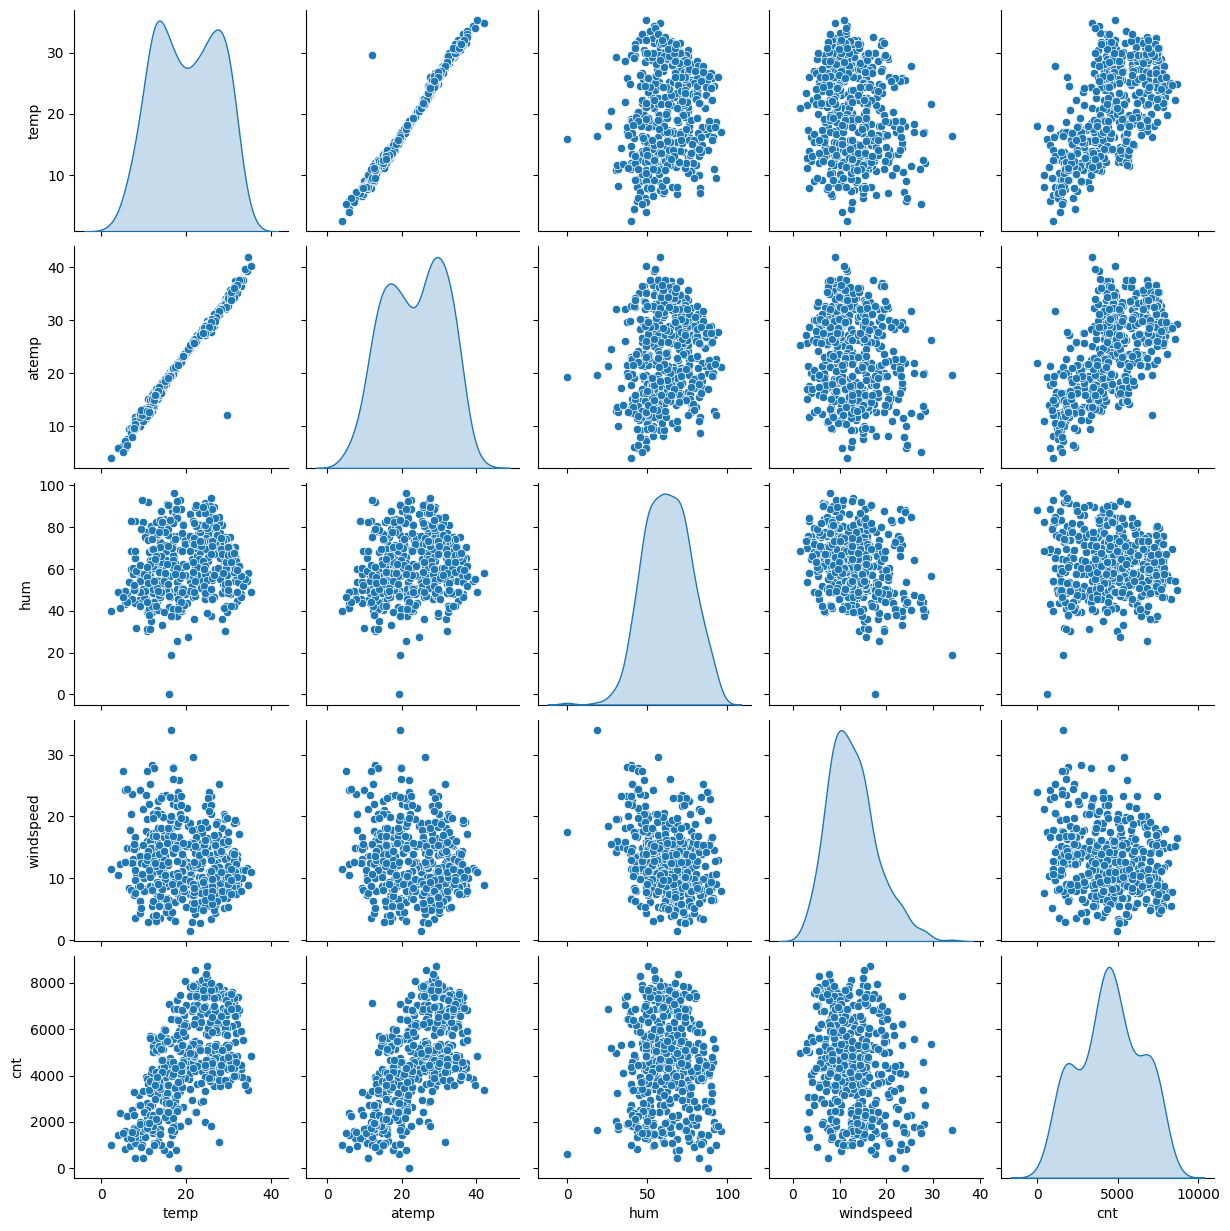

In [108]:
# Create a new dataframe of only numeric variables:

data_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(data_num, diag_kind='kde')
plt.show()

The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'


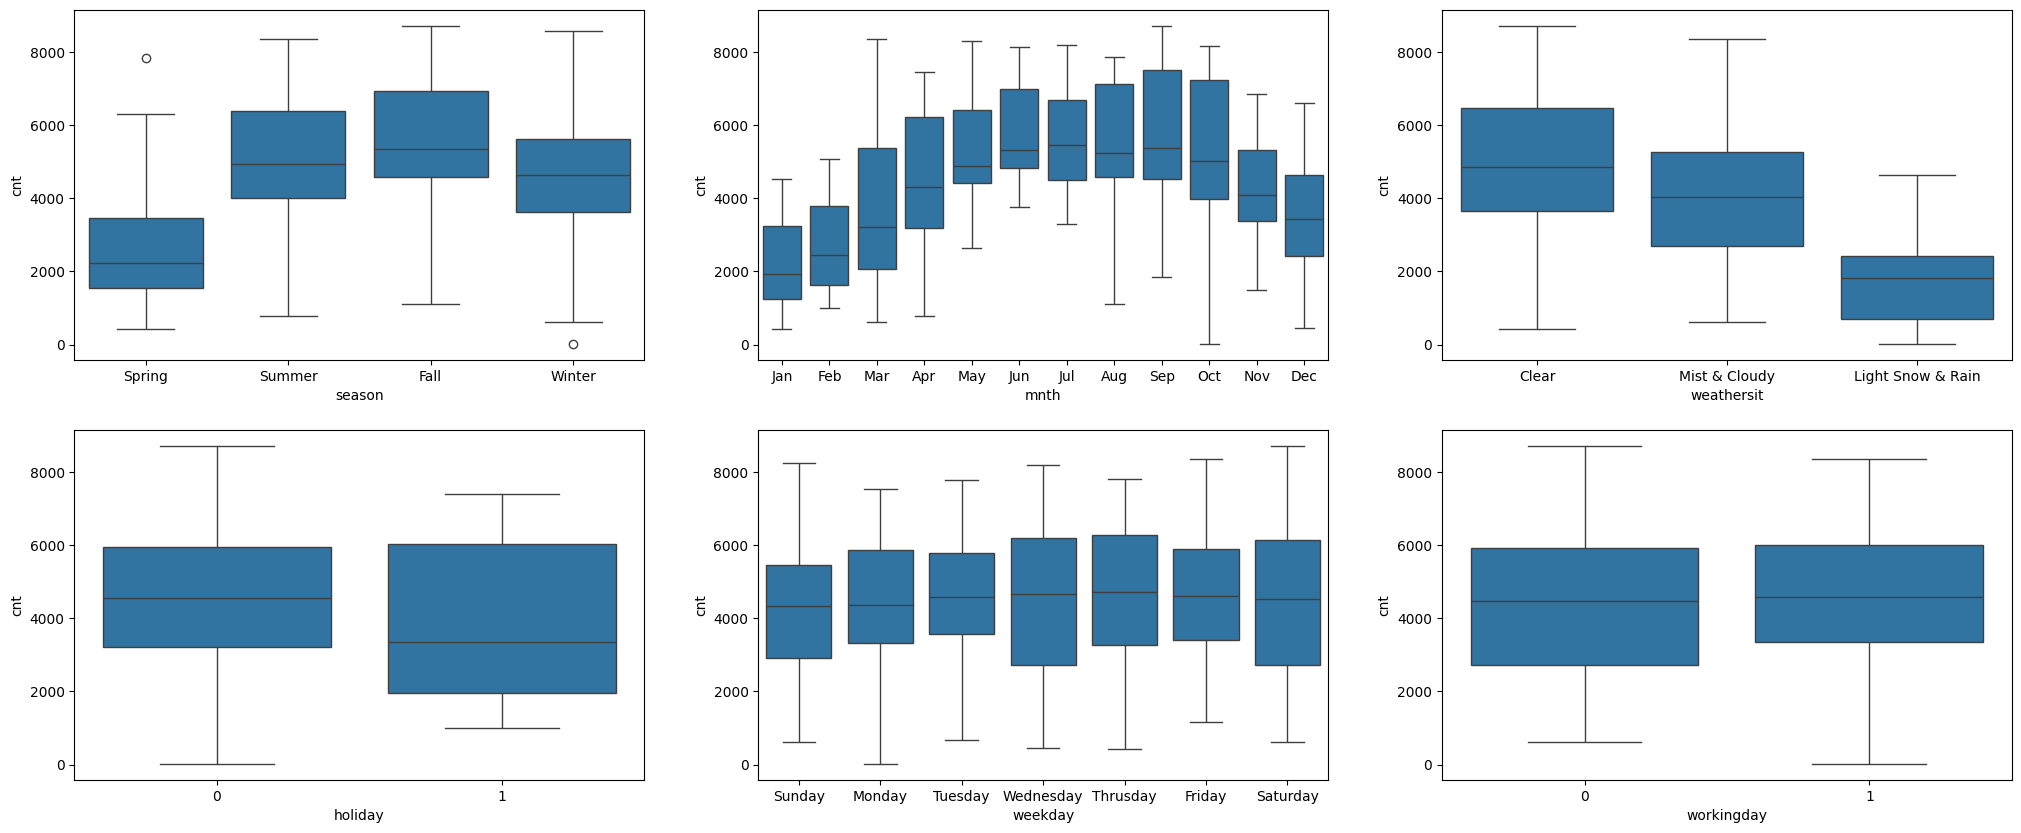

In [109]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.show()


We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

Building a Linear Model

In [110]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [111]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
y_train = df_train.pop('cnt')
X_train = df_train


In [112]:

lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.False_, np.int64(10)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.False_, np.int64(6)),
 ('atemp', np.False_, np.int64(13)),
 ('hum', np.False_, np.int64(14)),
 ('windspeed', np.False_, np.int64(11)),
 ('season_Summer', np.True_, np.int64(1)),
 ('season_Fall', np.True_, np.int64(1)),
 ('season_Winter', np.True_, np.int64(1)),
 ('mnth_Feb', np.False_, np.int64(5)),
 ('mnth_Mar', np.True_, np.int64(1)),
 ('mnth_Apr', np.False_, np.int64(4)),
 ('mnth_May', np.True_, np.int64(1)),
 ('mnth_Jun', np.True_, np.int64(1)),
 ('mnth_Jul', np.False_, np.int64(15)),
 ('mnth_Aug', np.False_, np.int64(2)),
 ('mnth_Sep', np.True_, np.int64(1)),
 ('mnth_Oct', np.False_, np.int64(3)),
 ('mnth_Nov', np.True_, np.int64(1)),
 ('mnth_Dec', np.True_, np.int64(1)),
 ('weekday_Monday', np.True_, np.int64(1)),
 ('weekday_Tuesday', np.False_, np.int64(12)),
 ('weekday_Wednesday', np.False_, np.int64(8)),
 ('weekday_Thrusday', np.False_, np.int64(9)),
 ('w

In [113]:

# Creating X_test dataframe with RFE selected variables
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [114]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)


Adding a constant variable

For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [115]:
X_train_rfe.head()

,const,yr,workingday,season_Summer,season_Fall,season_Winter,mnth_Mar,mnth_May,mnth_Jun,mnth_Sep,mnth_Nov,mnth_Dec,weekday_Monday,weekday_Saturday,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain
483,1.0,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False
650,1.0,1,0,False,False,True,False,False,False,False,False,False,False,True,False,False
212,1.0,0,1,False,True,False,False,False,False,False,False,False,True,False,False,False
714,1.0,1,0,False,False,True,False,False,False,False,False,True,False,False,True,False
8,1.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False


In [116]:
print(X_train_rfe.dtypes)
print(y_train.dtypes)
X_train_rfe = pd.get_dummies(X_train_rfe, drop_first=True)



const                           float64
yr                                int64
workingday                        int64
season_Summer                      bool
season_Fall                        bool
season_Winter                      bool
mnth_Mar                           bool
mnth_May                           bool
mnth_Jun                           bool
mnth_Sep                           bool
mnth_Nov                           bool
mnth_Dec                           bool
weekday_Monday                     bool
weekday_Saturday                   bool
weathersit_Mist & Cloudy           bool
weathersit_Light Snow & Rain       bool
dtype: object
int64


Ensure that all columns are int64 or float64, not object.
If any categorical columns exist, convert them into numerical form using pd.get_dummies() or LabelEncoder:
Below,  we explicitly convert X_train_rfe and y_train to numeric format:

In [117]:
import numpy as np
X_train_rfe = X_train_rfe.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')


Below we handle missing values, if any, by dropping or imputing them

In [118]:
print(X_train_rfe.isnull().sum())
print(y_train.isnull().sum())
X_train_rfe.dropna(inplace=True)  
y_train.dropna(inplace=True)


const                           0
yr                              0
workingday                      0
season_Summer                   0
season_Fall                     0
season_Winter                   0
mnth_Mar                        0
mnth_May                        0
mnth_Jun                        0
mnth_Sep                        0
mnth_Nov                        0
mnth_Dec                        0
weekday_Monday                  0
weekday_Saturday                0
weathersit_Mist & Cloudy        0
weathersit_Light Snow & Rain    0
dtype: int64
0


In [119]:
import statsmodels.api as sm
X_train_rfe = np.asarray(X_train_rfe, dtype=np.float64)
y_train = np.asarray(y_train, dtype=np.float64)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          3.22e-154
Time:                        22:35:35   Log-Likelihood:                -4194.0
No. Observations:                 510   AIC:                             8420.
Df Residuals:                     494   BIC:                             8488.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1556.4826    138.050     11.275      0.0

1) Model Performance
R-squared = 0.785 → The model explains 78.5% of the variance in the dependent variable. This is a good fit but leaves room for improvement.
Adjusted R-squared = 0.779 → Since it's close to R², the model isn’t overfitting despite having 15 predictors.
2️) Statistical Significance of Predictors
P-values: All predictors have a p-value of 0.000, meaning they are statistically significant at a 95% confidence level (p < 0.05).


In [120]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure X_train_rfe is a DataFrame
if isinstance(X_train_rfe, np.ndarray):
    X_train_rfe = pd.DataFrame(X_train_rfe)  # Convert back to DataFrame

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_rfe.columns  # Ensure column names exist
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]

print(vif_data)

    Feature        VIF
0         0  11.571661
1         1   1.011255
2         2   1.646352
3         3   2.289366
4         4   1.891204
5         5   2.244978
6         6   1.186289
7         7   1.638982
8         8   1.233379
9         9   1.188808
10       10   1.607143
11       11   1.237793
12       12   1.042124
13       13   1.641046
14       14   1.050251
15       15   1.039127


Above, VIF > 10 suggests high multicollinearity → consider dropping or transforming those variables.
So column 0 i.e. year has VIF>10, so it can be dropped.

In [121]:
X_train_rfe = np.delete(X_train_rfe, 0, axis=1)

# Ensure X_train_rfe is a DataFrame
if isinstance(X_train_rfe, np.ndarray):
    X_train_rfe = pd.DataFrame(X_train_rfe)  # Convert back to DataFrame

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_rfe.columns  # Ensure column names exist
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]

print(vif_data)

    Feature       VIF
0         0  1.876231
1         1  3.148714
2         2  2.633495
3         3  1.981469
4         4  2.564961
5         5  1.213382
6         6  1.800331
7         7  1.329655
8         8  1.295425
9         9  1.754510
10       10  1.305446
11       11  1.199883
12       12  1.412582
13       13  1.537166
14       14  1.064922


In [122]:
X_train_lm1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          3.22e-154
Time:                        22:35:35   Log-Likelihood:                -4194.0
No. Observations:                 510   AIC:                             8420.
Df Residuals:                     494   BIC:                             8488.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1556.4826    138.050     11.275      0.0

In [123]:
X_train_lm1

,const,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
507,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
y_train_pred = lm1.predict(X_train_lm1)

In [130]:
import pandas as pd

# Assuming X_train was your original DataFrame before RFE
X_train_rfe = pd.DataFrame(X_train_rfe, columns=X_train.columns[rfe.support_])

# Check column names
print(X_train_rfe.head())

column_names = ['workingday', 'season_Summer', 'season_Fall', 'season_Winter','mnth_Mar','mnth_May','mnth_Jun','mnth_Sep','mnth_Nov','mnth_Dec','weekday_Monday','weekday_Saturday','weathersit_Mist & Cloudy ','weathersit_Light Snow & Rain']  # Replace with actual names
X_train_rfe = pd.DataFrame(X_train_rfe, columns=column_names)

   yr  workingday  season_Summer  season_Fall  season_Winter  mnth_Mar  \
0 NaN         NaN            NaN          NaN            NaN       NaN   
1 NaN         NaN            NaN          NaN            NaN       NaN   
2 NaN         NaN            NaN          NaN            NaN       NaN   
3 NaN         NaN            NaN          NaN            NaN       NaN   
4 NaN         NaN            NaN          NaN            NaN       NaN   

   mnth_May  mnth_Jun  mnth_Sep  mnth_Nov  mnth_Dec  weekday_Monday  \
0       NaN       NaN       NaN       NaN       NaN             NaN   
1       NaN       NaN       NaN       NaN       NaN             NaN   
2       NaN       NaN       NaN       NaN       NaN             NaN   
3       NaN       NaN       NaN       NaN       NaN             NaN   
4       NaN       NaN       NaN       NaN       NaN             NaN   

   weekday_Saturday  weathersit_Mist & Cloudy  weathersit_Light Snow & Rain  
0               NaN                       NaN     

X_train_lm1

In [132]:
X_train_lm2 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          3.22e-154
Time:                        22:39:48   Log-Likelihood:                -4194.0
No. Observations:                 510   AIC:                             8420.
Df Residuals:                     494   BIC:                             8488.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1556.4826    138.050     11.275      0.0

/var/folders/hh/wr_z0kp96vq52xnmzzdm8kxw0000gn/T/ipykernel_1167/1424387036.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


<Figure size 640x480 with 0 Axes>

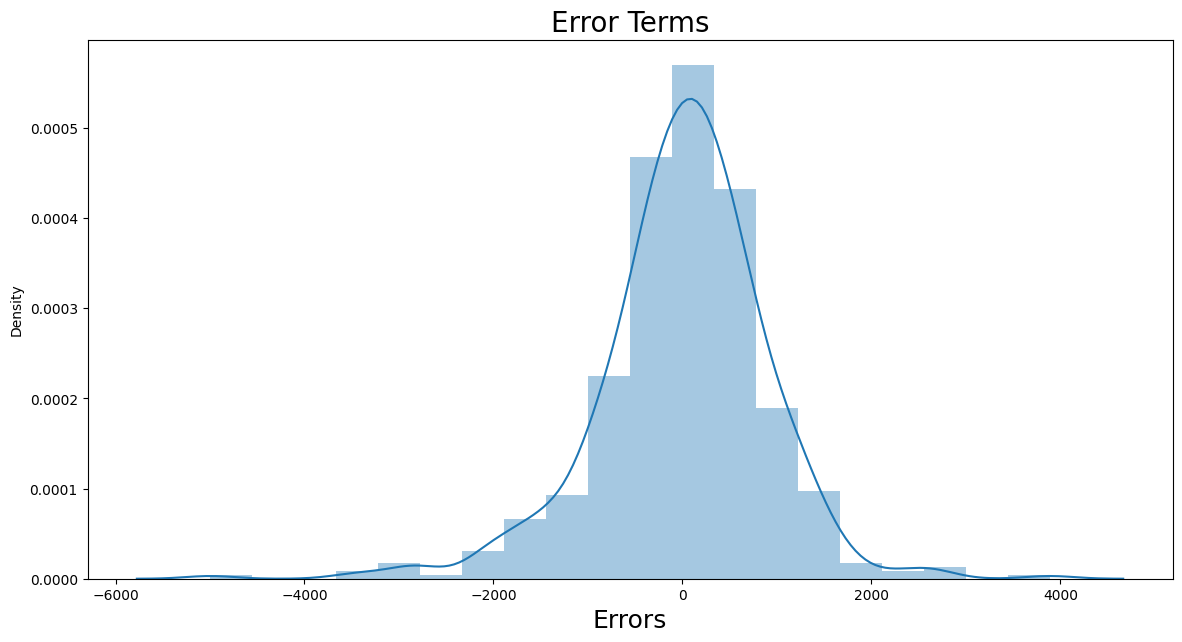

In [133]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()